Populating the interactive namespace from numpy and matplotlib
[[5.8842, -8.4849], [3.7173, -8.378], [1.8848, -8.2992], [0.3242, -8.2267], [-0.9854, -8.1606], [-2.0515, -8.1226], [-2.817, -8.1995], [-3.4026, -8.5221], [-4.0924, -8.7569], [-4.7535, -8.8718], [-5.3518, -8.9022], [-5.8675, -8.8848], [-6.3085, -8.8501], [-6.6888, -8.808], [-7.0184, -8.7607], [-7.304, -8.709], [-7.5507, -8.6542], [-7.763, -8.5979], [-7.9451, -8.5418], [-8.1009, -8.4872], [-8.2339, -8.4351], [-8.3475, -8.386], [-8.4442, -8.3404], [-8.5267, -8.2985], [-8.5971, -8.2601], [-8.657, -8.2254], [-8.7081, -8.1939], [-8.7518, -8.1657], [-8.789, -8.1404], [-8.8209, -8.1179], [-8.8481, -8.0978], [-8.8714, -8.08], [-8.8914, -8.0642], [-8.9085, -8.0502], [-8.9232, -8.0379], [-8.9358, -8.027], [-8.9466, -8.0175], [-8.9559, -8.0091], [-8.964, -8.0017], [-8.9709, -7.9952], [-8.9768, -7.9896], [-8.982, -7.9846], [-8.9864, -7.9802], [-8.9902, -7.9764], [-8.9935, -7.9731], [-8.9964, -7.9702], [-8.9988, -7.9677], [-9.001, -7.96

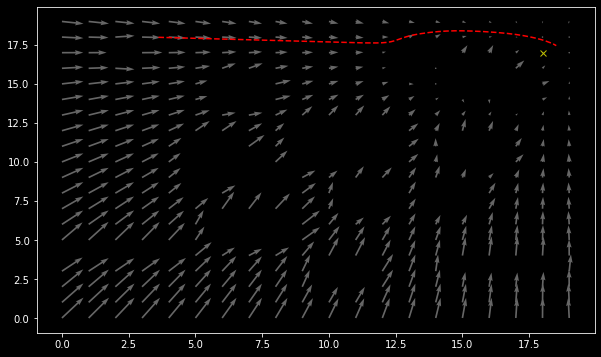

In [32]:
%pylab inline
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
import warnings

plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.rcParams['animation.embed_limit'] = 2**128



# Potential functions
def force_goal(x, y, goal):
    goal_x, goal_y, k_goal = goal
    Fx_goal, Fy_goal = k_goal * (goal_x - x), k_goal *(goal_y - y)
    return Fx_goal, Fy_goal

def force_obstacle(x, y, obstacle):
    (obs_x, obs_y, k_obs) = obstacle
    dist_x, dist_y = x - obs_x, y - obs_y
    dist_obs = np.hypot(dist_x, dist_y)
    Fx_obs = (dist_x / dist_obs) * k_obs / dist_obs ** 3
    Fy_obs = (dist_y / dist_obs) * k_obs / dist_obs ** 3

    return Fx_obs, Fy_obs 

def total_force(x, y, goal, obstacles):
    Fx, Fy = force_goal(x, y, goal)

    for obs in obstacles:
        Fo_x, Fo_y = force_obstacle(x, y, obs)
        Fx += Fo_x
        Fy += Fo_y
    return Fx, Fy

def plot_vector_field(ax=plt, fmax = .6):
    X, Y = np.meshgrid(np.arange(0, 20, 1), np.arange(0,20, 1))

    # Vector field of the forces
    Fx, Fy = total_force(X, Y, goal, obstacles)
    # For visualization
    F_m = np.hypot(Fx, Fy)
    Fx[F_m > fmax] = None
    Fy[F_m > fmax] = None
    # Plot
    # quiver(X, Y, Fx, Fy,  F_m, color='0.4', scale=None)
    quiver(X, Y, Fx, Fy, color='0.4')
    

    

def simulate(q, goal, obstacles, num_steps=200, delta_time=1.9):
    trajectory = []
    for i in range(num_steps):
        force = total_force(q[0], q[1], goal, obstacles)
        # Robot velocity follows the force vector
        vel = np.array(force)
        # Integrate
        q += vel * delta_time
        trajectory.append(np.copy(q))

    
    return np.array(trajectory)

#Environment
goal = [18, 17, 0.02]

# Obstacles (x, y, k), where k is the rejection multiplier
#obstacles = [[3., 2.5, .07]]         
              
n, m = 20,20  # number of rows and columns respectively.
# to convert to coppeliasim, the origin of the graph needs to be moved up and over 10 by 10
# Create a matrix to represent the cells of the grid
grid_cells = np.zeros((n,m))

#leftmost block
grid_cells[4][0] = 1;
grid_cells[4][1] = 1;
grid_cells[4][2] = 1;
grid_cells[4][3] = 1;
grid_cells[4][4] = 1;
#Dot at top
grid_cells[17][2] = 1;
#Other dot at top
grid_cells[14][6] = 1;
grid_cells[14][7] = 1;
grid_cells[15][6] = 1;
grid_cells[15][7] = 1;
#dot near diagonal
grid_cells[8][5] = 1;
grid_cells[9][5] = 1;
#medium dot
grid_cells[5][6] = 2;
grid_cells[6][6] = 2;
grid_cells[5][7] = 2;
grid_cells[6][7] = 2;
grid_cells[5][8] = 2;
grid_cells[6][8] = 2;
#other middle dot
grid_cells[8][11] = 2;
grid_cells[8][12] = 1;
grid_cells[7][11] = 2;
grid_cells[7][12] = 1;
#second leftmost
grid_cells[7][15] = 1;
grid_cells[8][15] = 1;
grid_cells[7][14] = 1;
grid_cells[8][14] = 1;
#leftmost
grid_cells[11][16] = 1;
grid_cells[11][15] = 2;
grid_cells[10][16] = 2;
grid_cells[10][15] = 1;
#bottommost
grid_cells[2][10] = 1;
grid_cells[3][10] = 1;
grid_cells[4][10] = 0;
grid_cells[2][11] = 1;
grid_cells[3][11] = 1;
grid_cells[4][11] = 0;
#rightmost brick
grid_cells[3][15] = 1;
grid_cells[3][16] = 1;
grid_cells[3][17] = 1;
grid_cells[3][18] = 1;
#middle brick
grid_cells[10][9] = 1;
grid_cells[10][10] = 1;
grid_cells[10][11] = 1;
grid_cells[10][12] = 1;
grid_cells[11][9] = 1;
grid_cells[11][10] = 1;
grid_cells[11][11] = 1;
grid_cells[11][12] = 1;
grid_cells[12][9] = 1;
grid_cells[12][10] = 1;
grid_cells[12][11] = 1;
grid_cells[12][12] = 1;
#middle diagonal
grid_cells[11][5] = 1;
grid_cells[11][6] = 1;
grid_cells[10][5] = 1;
grid_cells[10][6] = 1;
grid_cells[9][6] = 1;
grid_cells[10][7] = 1;
grid_cells[9][7] = 1;
grid_cells[8][7] = 1;
grid_cells[9][8] = 1;
grid_cells[8][8] = 1;
#top right diagonal
grid_cells[18][13] = 1;
grid_cells[17][13] = 1;
grid_cells[17][14] = 1;
grid_cells[16][13] = 1;
grid_cells[16][15] = 2;
grid_cells[16][16] = 2;
grid_cells[15][15] = 2;
grid_cells[15][16] = 2;
grid_cells[15][17] = 2;
grid_cells[15][17] = 2;
obstacles = []
for x in range(0,20):
    for y in range(0,20):
        if grid_cells[x][y] == 1:
            obstacles.append([y, x, 0.04])
        if grid_cells[x][y] == 2:
            obstacles.append([y, x, 0.08])
grid_cells[10][15] = 1;
#obstacles.append([14.5, 10.5, 1.4])
# Initial location
q = np.array((1.0, 3.0))

# Show result
trajectory = simulate(q, goal, obstacles,num_steps=330, delta_time=2.)
plot(trajectory[:,0], trajectory[:,1], 'r--')
plot(goal[0], goal[1], 'yx')
with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        plot_vector_field()
#coords = trajectory.tolist()
coords1 = []
for coord in trajectory:
    coords1.append([round(9.5-coord[0],4), round(9.5-coord[1],4)])
coords = coords1[::4]
print(coords)